In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math, random

# Z-Transform and Its Applications

The **z-transform** of a discrete-time signal $x(n)$ is defined as a *power series*:

$$X(z) = \sum_{n=-\infty}^{\infty} x(n) z^{-n} $$

where $z\in \mathbb{C}$. This is typically represented by

$$X(z) = Z[x(n)] $$

Since the z-transform is an infinite power series, it only exists for the values of $z$ for which the series converges. The **region of convergence** (ROC) of $X(z)$ is the set of all values of $z$ for which $X(z)$ has a finite value. 

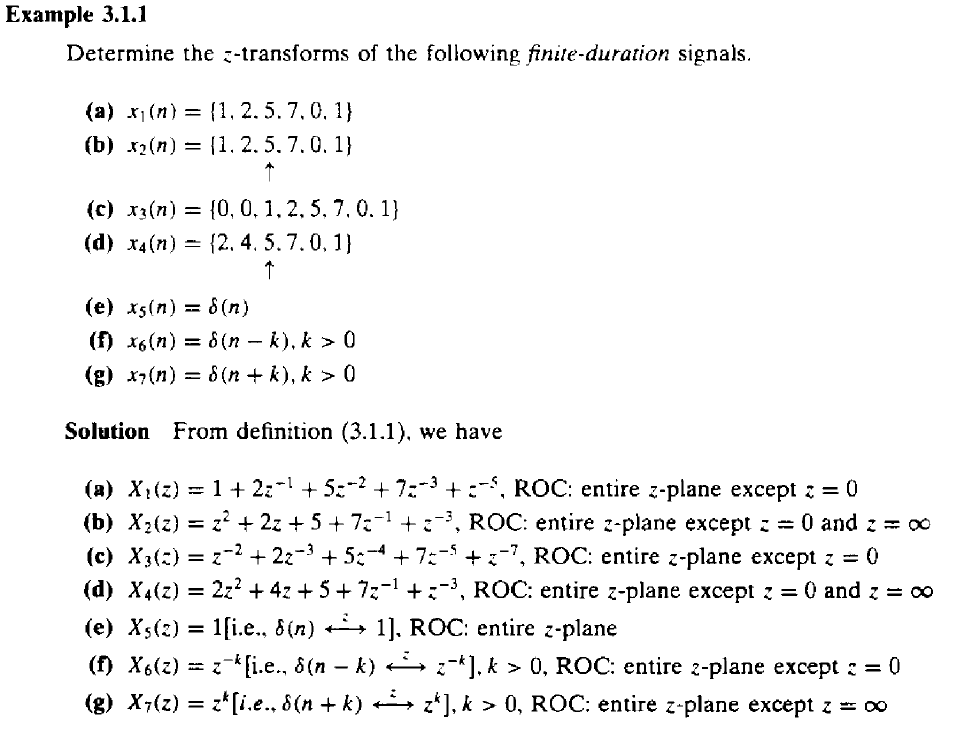

The ROC of a finite duration signal is the **entire** z-plane, typically minus the points $z=0$ and/or $z=\infty$. 

Mathematically, the $z$-transform is an alternative representation of a signal. Note the coefficient of $z^{-n}$ *is* the value of the the signal at time sample $n$.

Expressing $z$ in polar form where the modulus is $r=|z|$ and the argument is $\theta=\angle z$. The $z$-transform becomes:

$$X(z)|_{z=re^{j\theta}} = \sum_{n=-\infty}^{\infty} x(n)r^{-n}e^{-j\theta n} $$ 

## Properties of the z-transform

### Linearity

If $x_1(n)\longleftrightarrow X_1(z)$ and $x_2(n)\longleftrightarrow X_2(z)$ then

$$x(n) = a_1x_1(n) + a_2x_2(n)\longleftrightarrow X(z) = a_1X_1(z) + a_2X_2(z)$$

### Time shifting

If $x(n)\longleftrightarrow X(z)$ then 

$$ x(n-k)\longleftrightarrow z^{-k}X(z) $$

The ROC is the same except for $z=0$ if $k>0$ and $z=\infty$ if $k<0$.

### Scaling in the z-domain

If $x(n)\longleftrightarrow X(z)$ with ROC $r_1 < |z| < r_2$ then 

$$  a^nx(n)\longleftrightarrow X(a^{-1}z)$$ with ROC $|a|r_1 < |z| < |a|r_2$

### Time reversal

If $x(n)\longleftrightarrow X(z)$ with ROC $r_1 < |z| < r_2$ then 

$$  x(-n)\longleftrightarrow X(z^{-1})$$ with ROC $\frac{1}{r_2} < |z| < \frac{1}{r_1}$

### Differentiation in the z-domain

If $x(n)\longleftrightarrow X(z)$ with ROC $r_1 < |z| < r_2$ then 

$$ nx(n)\longleftrightarrow -z\frac{dX(z)}{dz} $$ with the same ROC.

### Convolution of two sequences

If $x_1(n)\longleftrightarrow X_1(z)$ and $x_2(n)\longleftrightarrow X_2(z)$ then 

$$ x(n) = x_1 * x_2(n) \longleftrightarrow X(z) = X_1(z)X_2(z) $$ with the ROC being the intersection of that for $X_1(z)$ and $X_2(z)$.

### Correlation of two sequences

If $x_1(n)\longleftrightarrow X_1(z)$ and $x_2(n)\longleftrightarrow X_2(z)$ then 

$$r_{x_1x_2}(l) = \sum_{n=-\infty}^{\infty} x_1(n)x_2(n-l) \longleftrightarrow R_{x_1x_2}(z) = X_1(z)X_2(z^{-1}) $$ with the ROC being the intersection of that for $X_1(z)$ and $X_2(z^{-1})$.

### Multiplication of two sequences

If $x_1(n)\longleftrightarrow X_1(z)$ and $x_2(n)\longleftrightarrow X_2(z)$ then 

$$ x(n) = x_1 x_2(n) \longleftrightarrow X(z) = \frac{1}{2\pi j} \oint_C X_1(v)X_2(\frac{z}{v})v^{-1}dv$$ with ROC being $r_{1l}r_{2l} < |z| < r_{1u}r_{2u} $ .

### Parseval's Theorem

If $x_1(n)$ and $x_2(n)$ are complex-valued sequences, then

$$ \sum_{n=-\infty}^{+\infty} x_1(n)x_2^*(n) =  \frac{1}{2\pi j} \oint_C X_1(v)X_2^*(\frac{1}{v^*})v^{-1}dv $$

### Summary

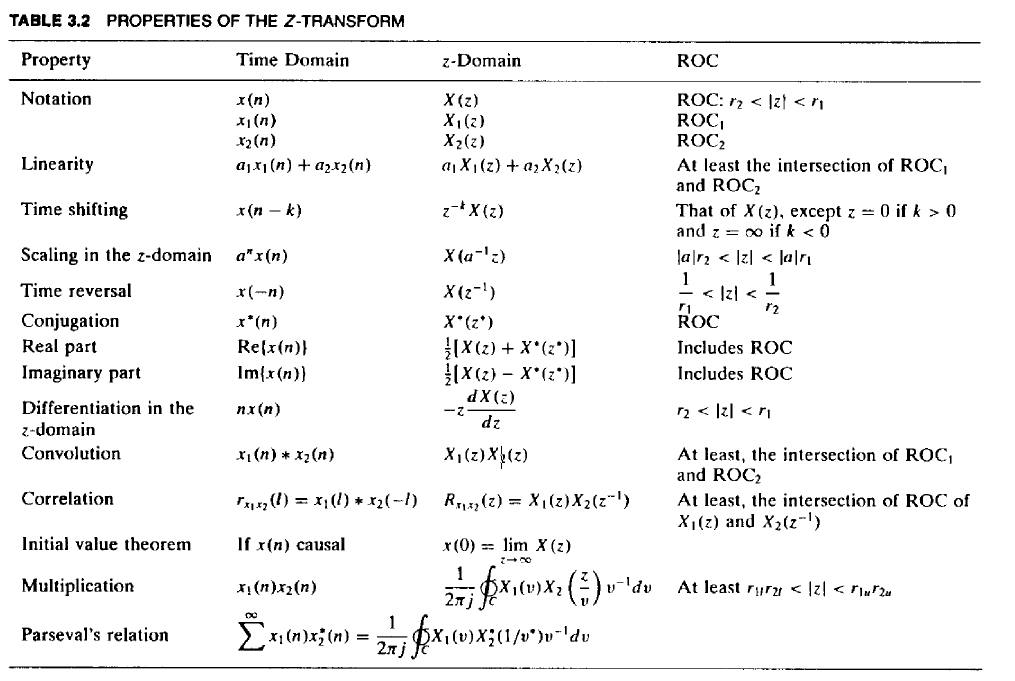

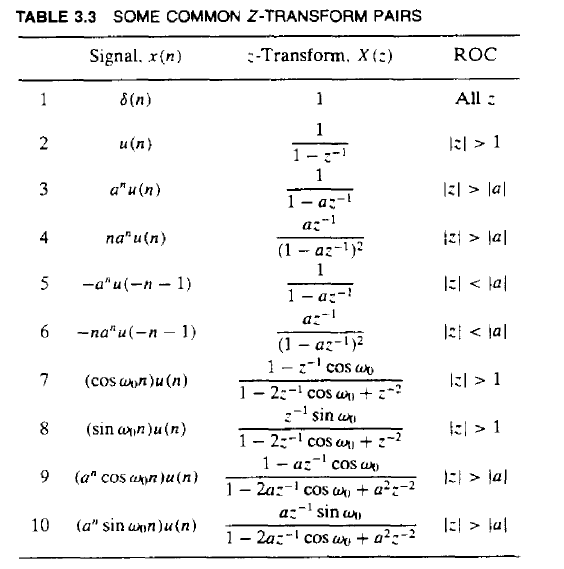

## Poles and Zeros

Assuming a ration function $X(z)$. 

- Zeros of a z-transform: values of $z$ s.t. $X(z)=0$
- Poles of a z-transform: values of $z$ s.t. $X(z)=\infty$

Note:

$$ X(z) = \frac{N(z)}{D(z)} = \frac{b_0 + b_1z^{-1}+...+b_Mz^{-M}}{a_0 + a_1z^{-1}+...+a_Nz^{-N}} $$

Assuming $a_0,b_0\neq0$, $X(z)$ can be reexpressed as:

$$X(z) = Gz^{N-M}\frac{\prod_{k=1}^M(z-z_k)}{\prod_{k=1}^N(z-p_k)} $$

where $G=b_0/a_0$, $z_k$ are the zeros, $p_k$ are the poles, $|N-M|$ zeros if $N>M$ or poles if $N<M$ at the origin $z=0$. A zero is at $z=\infty$ if $X(\infty)=0$ and a pole if $X(\infty)=\infty$. **$X(z)$ should have the same number of poles and zeros.**

### Pole Location and Time-Domain Behavior for Causal Signals

Consider real, causal signals. The characteristic behavior of causal signals depends on whether the poles of the transform are contained in the region $|z|<1$ or on the circle $|z|=1$. If a real signal has a z-transform with one pole, the pole has to be real. The ONLY such signal is the real exponential

$$ x(n) = a^nu(n) \longleftrightarrow X(z) = \frac{1}{1-az^{-1}}$$ 

with ROC $|z|>|a|$ having one zero at $z_1=0$ and one pole $p_1=a$ on the real axis. Avoid causal signals with poles outside the unit circle; they are unbounded and should be avoided.

A causal real signal with a double real pole has the form:

$$ x(n) = na^nu(n) $$

Contrary to a single-pole signal, a double real pole on the unit circle results in an unbounded signal. 

To summarize, causal real signals with simple real poles or simple complex conjugate pairs o f poles, which are inside or on the unit circle are always bounded in amplitude. Furthermore, a signal with a pole (or a complex-conjugate pair of poles) near the origin decays more rapidly than one associated with a pole near (but inside) the unit circle. Thus the tim e behavior o f a signal depends strongly on the location of its poles relative to the unit circle. Zeros also affectthe behavior of a signal but not as strongly as poles. 

- This too applies to causal LTI systems, since their impulse response is a causal signal. 

### System Function of a LTI system

Just like with the Fourier Transform, in $z$-space thr convolution of two signals is the product of their transforms:

$$Y(z) = H(z)X(z) $$

We can get the response of a system of known behavior $h(n)$ and input signal $x(n)$ by multiplying their transforms to get $Y(z)$ and taking the inverse z-transform. Or, if the input and output are known, then we can get the unit sample response from:

$$H(z) = \frac{Y(z)}{X(z)} $$

then taking the inverse z-transform. Note the transform $H(z)$ is called the **system function**. These relations are useful when the system is described by a linear constant-coefficient difference equation of form:

$$ y(n) = -\sum_{k=1}^{N} a_ky(n-k) + \sum_{k=0}^M b_kx(n-k) $$

which after some algebra becomes:

$$ H(z) = \frac{\sum_{k=0}^M b_kz^{-k}}{1 + \sum_{k=1}^{N} a_kz^{-k}} $$

For $a_k=0$ for $1\leq k \leq N$ this reduces to:

$$H(z) = \frac{1}{z_M} \sum_{k=0}^M b_kz^{M-k} $$

This contains $M$ zeros determined by ${b_k}$ and an $M$th order pole at $z=0$. This system is called an **all-zero system**. It has a finite-duration impulse response, and is called an *FIR system / moving average* system.

For $b_k=0$ for $1\leq k \leq M$ this reduces to:

$$H(z) = \frac{b_0z^N}{\sum_{k=0}^N a_kz^{N-k}}  $$

Here $H(z)$ has $N$ poles, determined by ${a_k}$ and an $N$th order pole at $z=0$. This system is called an **all-pole system**. It has a infinite-duration impulse response, and is called an *IIR system*.

For a system with both poles and zeros, it is called a **pole-zero** system with $N$ poles and $M$ zeros. Poles/zeros at $z=0,\infty$ are implied but not counted. A pole-zero system is a type of IIR system.

## Inverse z-transform

The inverse $z$-transform is:

$$ x(n) = \frac{1}{2\pi j}\oint_C X(z) nz^{n-1} dz $$

where the integral is a contour over a closed path $C$ that encloses the origin and lies within the region of convergence of $X(z)$. 

### Using a power series expansion

Given a z-transform $X(z)$ with its corresponding ROC, we can expand $X(z)$ into a power series of the form:

$$ X(z) = \sum_{n=-\infty}^{\infty} c_nz^{-n} $$

which converges in the given ROC. By uniqueness, $x(n)=c_n\forall n$. When $X(z)$ is rational, this can be done via long division. 

### Using a partial-fraction expansion

Without loss of generality, one can assume that if $X(z)$ is a rational function, then one can assume $a_0=1$ such that:

$$ X(z) = \frac{N(z)}{D(z)} = \frac{b_0 + b_1z^{-1}+...+b_Mz^{-M}}{1 + a_1z^{-1}+...+a_Nz^{-N}} $$

A rational function is called proper if $A_N\neq0$ and $M<N$. That is, the number of finite zeros is less than the number of finite poles. An improper rational function $M\geq N$ can always be written as the sum of a polynomial and a proper rational function.

$$ X(z) = \frac{N(z)}{D(z)} = c_0 + c_1z^{-1}+...+c_{M-N}z^{-(M-N)} + \frac{N_1(z)}{D(z)}  $$

Within partial fraction expansion there are distinct pole cases and multipole cases. 

### Decomposition of rational z-transforms

There are issues with the decomposition of rational z-transforms. If the poles are distinct in a rational z-transform partial fraction decomposition, then it can be expanded as:

$$ X_{pr}(z) = A_1\frac{1}{1-p_1z^{-1}} + A_2\frac{1}{1-p_2z^{-1}} + ... + A_N\frac{1}{1-p_Nz^{-1}} $$

there maybe complex conjugate pairs of poles. Usually signals are real, so avoid complex coefficients in the decomposition. DO this by grouping and combining terms containing complex-conjugate poles via:

$$ \frac{A}{1-pz^{-1}}+\frac{A^*}{1-p^*z^{-1}} = \frac{b_0+b_1z^{-1}}{1+a_1z^{-1}+a_2z^{-2}}$$

where $b_0=2Re(A)$, $-2Re(Ap^*)$, $a_1=-2Re(p)$, $a_2=|p|^2$.

## One-sided z-transform & Difference equations

### Solution of difference equations

## Analysis of LTI systems in the z-domain

### Response of systems with rational system functions

### Response of pole-zero systems with non-zero initial conditions

### Transient and steady state responses

### Causality and stability

### Pole-zero cancellations

### Multiple-order poles and stability

### Schur-Cohn stability test

### Stability of second-order systems

### Practice

Manually compute the $z$-transforms of:

- $\delta[n]$, $u[n]$, $a^n\cdot u[n]$, $n\cdot a^n\cdot u[n]$

Implement $z$-transform in Python:

- Computes $z$-transforms symbolically and numerically
- Plots pole zero diagrams in Python

Solve a difference equation using the $z$-transform

### Answers:

- Find $X(z)$ of $\delta(n)$

\begin{eqnarray}
    X(z) =& \sum_{n=0} \delta(n)z^{-n} \\
         =& 1\cdot z^0 \\
         =& 1
\end{eqnarray}

- Find $X(z)$ of $u(n)$

\begin{eqnarray}
    X(z) =& \sum_{n=-\infty}^{+\infty} u(n)z^{-n} \\
         =& \sum_{n=0}^{+\infty} z^{-n} \\
         =& \frac{1}{1-z^{-1}}
\end{eqnarray}

- Find $X(z)$ of $a^n\cdot u(n)$: Assuming $|z|>|a|$

\begin{eqnarray}
    X(z) =& \sum_{n=-\infty}^{+\infty} a^nu(n)z^{-n} \\
         =& \sum_{n=0}^{+\infty} a^nz^{-n} \\
         =& \frac{1}{1-(az^{-1})}
\end{eqnarray}

- Find $X(z)$ of $na^n\cdot u(n)$: Assuming $|z|>|a|$ and $x_1(n)=a^nu(n)$

\begin{eqnarray}
    X(z) =& \sum_{n=-\infty}^{+\infty} na^nu(n)z^{-n} \\
    nx(n)\longleftrightarrow& X(z)=-z\frac{dX_1(z)}{dz} \\
         \Rightarrow& \frac{az^{-1}}{(1-az^{-1})^2}
\end{eqnarray}

Z-transform of x[n] = 2^n:
X(z) = Sum(2**n*Heaviside(n)/z**n, (n, 0, oo))


C:\Users\theit\AppData\Local\Temp\ipykernel_26392\3598739951.py:31: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(w, 20 * np.log10(abs(h)))


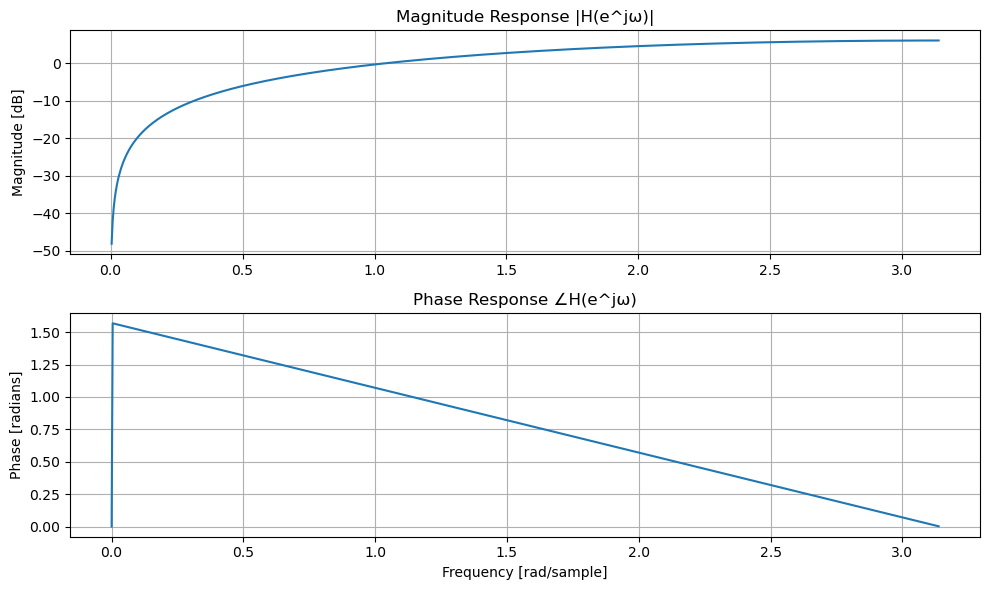

In [4]:
# Section 1: Manual Symbolic Z-Transform
from sympy import symbols, Sum, oo, Heaviside, simplify, Function

# Define symbols
n, z = symbols('n z', integer=True)
a = symbols('a')

# Define sequence x[n] = 2^n * u[n]
x_n = 2**n * Heaviside(n)

# Compute one-sided Z-transform using definition
X_z = Sum(x_n * z**(-n), (n, 0, oo)).doit()
X_z_simplified = simplify(X_z)

print("Z-transform of x[n] = 2^n:")
print(f"X(z) = {X_z_simplified}")

# Optionally: manually confirm inverse (from table)
# inverse z-transform of 1 / (1 - 2 z^{-1}) is 2^n u[n]

# Define FIR filter: h[n] = delta[n] - delta[n-1]
b = [1, -1]  # Numerator coefficients (FIR)
a = [1]      # Denominator (no feedback)

# Compute frequency response (on unit circle in z-domain)
w, h = signal.freqz(b, a, worN=800)

# Plot magnitude and phase
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(w, 20 * np.log10(abs(h)))
axs[0].set_title('Magnitude Response |H(e^jω)|')
axs[0].set_ylabel('Magnitude [dB]')
axs[0].grid()

axs[1].plot(w, np.angle(h))
axs[1].set_title('Phase Response ∠H(e^jω)')
axs[1].set_ylabel('Phase [radians]')
axs[1].set_xlabel('Frequency [rad/sample]')
axs[1].grid()

plt.tight_layout()
plt.show()


C:\Users\theit\AppData\Local\Temp\ipykernel_26392\20690150.py:13: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(w, 20 * np.log10(abs(h)), label='Magnitude (dB)')
C:\Users\theit\AppData\Local\Temp\ipykernel_26392\20690150.py:14: RuntimeWarning: divide by zero encountered in log10
  axs[0].scatter(frequencies, 20 * np.log10(abs(np.interp(frequencies, w, h))),
C:\Users\theit\AppData\Local\Temp\ipykernel_26392\20690150.py:17: RuntimeWarning: divide by zero encountered in log10
  axs[0].annotate(label, (freq, 20 * np.log10(abs(np.interp(freq, w, h))) + 0.5),


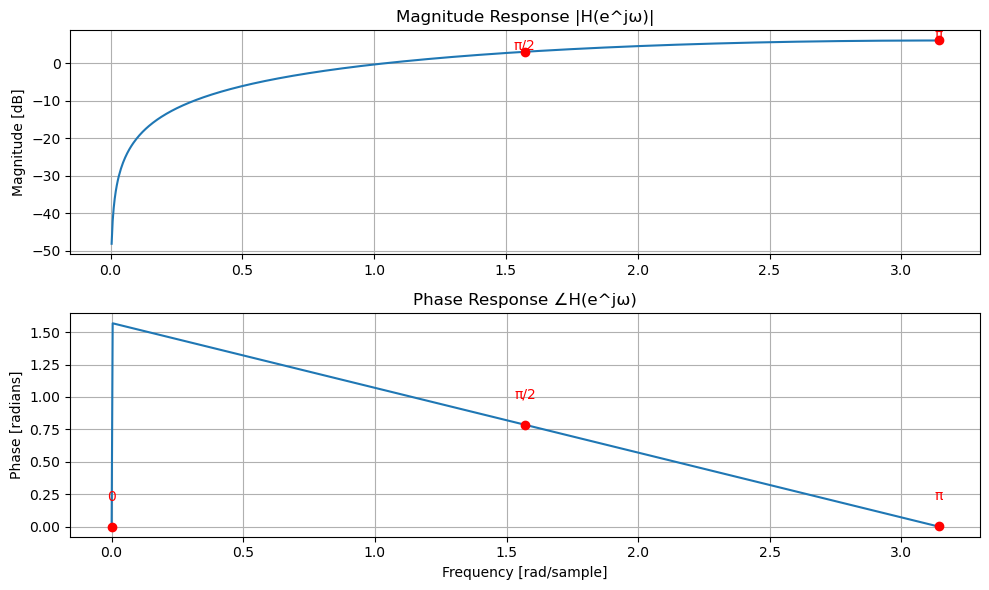

In [5]:
# Frequency response on the unit circle
w, h = signal.freqz(b, a, worN=800)
frequencies = [0, np.pi/2, np.pi]
labels = ['0', 'π/2', 'π']

# Compute phase with unwrapping
phase = np.unwrap(np.angle(h))

# Plot magnitude response
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Magnitude plot
axs[0].plot(w, 20 * np.log10(abs(h)), label='Magnitude (dB)')
axs[0].scatter(frequencies, 20 * np.log10(abs(np.interp(frequencies, w, h))),
               color='red', zorder=5)
for freq, label in zip(frequencies, labels):
    axs[0].annotate(label, (freq, 20 * np.log10(abs(np.interp(freq, w, h))) + 0.5),
                    ha='center', color='red')
axs[0].set_title('Magnitude Response |H(e^jω)|')
axs[0].set_ylabel('Magnitude [dB]')
axs[0].grid()

# Phase plot
axs[1].plot(w, phase, label='Unwrapped Phase')
axs[1].scatter(frequencies, np.interp(frequencies, w, phase),
               color='red', zorder=5)
for freq, label in zip(frequencies, labels):
    axs[1].annotate(label, (freq, np.interp(freq, w, phase) + 0.2),
                    ha='center', color='red')
axs[1].set_title('Phase Response ∠H(e^jω)')
axs[1].set_ylabel('Phase [radians]')
axs[1].set_xlabel('Frequency [rad/sample]')
axs[1].grid()

plt.tight_layout()
plt.show()

| Concept     | Why It Matters                                     |
| ----------- | -------------------------------------------------- |
| Poles       | Dictate **stability**, resonance, and gain         |
| Zeros       | Cause **cancellation**, define notches and cutoffs |
| Unit Circle | Shows what frequencies are affected                |
| Placement   | Determines if filter is low-pass, high-pass, etc.  |


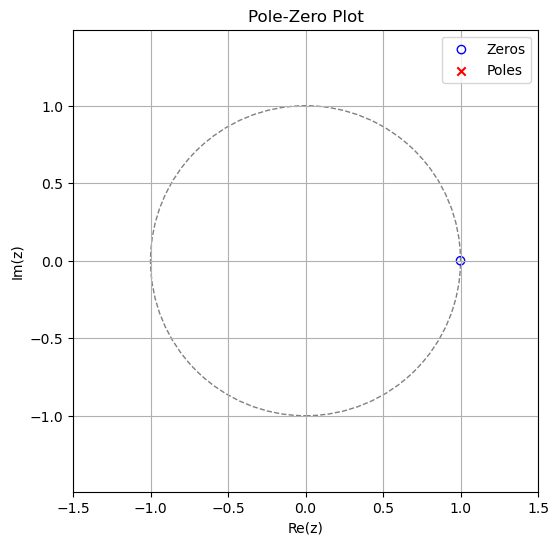

In [3]:
# Pole-zero diagram

# Define system: H(z) = 1 - z^-1
b = [1, -1]  # numerator (zeros)
a = [1]      # denominator (no poles except at origin)

zeros, poles, _ = signal.tf2zpk(b, a)

fig, ax = plt.subplots(figsize=(6, 6))

# Plot unit circle
uc = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
ax.add_artist(uc)

# Plot poles and zeros
ax.scatter(np.real(zeros), np.imag(zeros), marker='o', facecolors='none', edgecolors='b', label='Zeros')
ax.scatter(np.real(poles), np.imag(poles), marker='x', color='r', label='Poles')

ax.set_title('Pole-Zero Plot')
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.legend()
ax.grid()
ax.axis('equal')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.show()